In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 11.6 Resampling and Frequency Conversion


**Resampling** refers to the process of converting a time series from one frequency to another. 

Aggregating higher frequency data to lower frequency is called **downsampling**, while converting lower frequency to higher frequency is called **upsampling**. 


**DataFrame.resample(DateOffset/Timedelta/str, axis=0/1, closed={‘right’, ‘left’}: Which side of bin interval is closed., label={‘right’, ‘left’}, convention={‘start’, ‘end’, ‘s’, ‘e’}:  For PeriodIndex only, controls whether to use the start or end of rule.,  kind={‘timestamp’, ‘period’}, loffset=timedelta: Adjust the resampled time labels., base=None, on=str, level=str or int, origin='start_day', offset=Timedelta or str)**

In [3]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [4]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [5]:
ts.head(5)

2000-01-01    1.513449
2000-01-02    0.117248
2000-01-03   -0.973611
2000-01-04    0.700187
2000-01-05    0.368498
Freq: D, dtype: float64

In [6]:
ts.resample('M').mean()

2000-01-31   -0.043795
2000-02-29    0.009694
2000-03-31    0.092124
2000-04-30   -0.095956
Freq: M, dtype: float64

In [7]:
ts.resample('M', kind='period').mean() #monthly period

2000-01   -0.043795
2000-02    0.009694
2000-03    0.092124
2000-04   -0.095956
Freq: M, dtype: float64

# Downsampling

In [8]:
rng = pd.date_range('2000-01-01', periods=12, freq='min')
ts = pd.Series(np.arange(12), index=rng)
ts #arenging every array

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

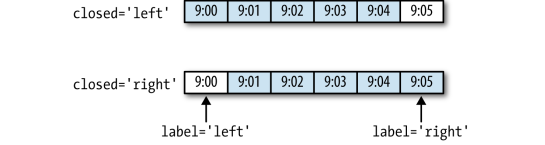

In [9]:
ts.resample('5min',closed='right' ).sum() 

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [10]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [11]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

**Open-High-Low-Close (OHLC) resampling**

In [12]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


# Upsampling and Interpolation

In [13]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2,freq='W-WED'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [14]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.660370,1.625521,-0.635427,0.198672
2000-01-12,-0.538933,-0.637949,-1.271374,-0.596326


In [15]:
df_daily = frame.resample('D').asfreq()

In [16]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.660370,1.625521,-0.635427,0.198672
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.538933,-0.637949,-1.271374,-0.596326


In [17]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.660370,1.625521,-0.635427,0.198672
2000-01-06,-0.660370,1.625521,-0.635427,0.198672
2000-01-07,-0.660370,1.625521,-0.635427,0.198672
2000-01-08,-0.660370,1.625521,-0.635427,0.198672
2000-01-09,-0.660370,1.625521,-0.635427,0.198672
2000-01-10,-0.660370,1.625521,-0.635427,0.198672
2000-01-11,-0.660370,1.625521,-0.635427,0.198672
2000-01-12,-0.538933,-0.637949,-1.271374,-0.596326


In [18]:
frame.resample('D').ffill(limit=2).head(5)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.66037,1.625521,-0.635427,0.198672
2000-01-06,-0.66037,1.625521,-0.635427,0.198672
2000-01-07,-0.66037,1.625521,-0.635427,0.198672
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN


In [19]:
 frame.resample('W-SUN').ffill()

,Colorado,Texas,New York,Ohio
2000-01-09,-0.660370,1.625521,-0.635427,0.198672
2000-01-16,-0.538933,-0.637949,-1.271374,-0.596326


# Resampling with Periods

In [20]:
frame = pd.DataFrame(np.random.randn(24, 4),index=pd.period_range('1-2000', '12-2001',freq='M'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [21]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-2.058904,1.262479,1.410477,1.856531
2000-02,-1.137237,-1.471842,0.800744,0.588015
2000-03,-0.624502,0.266269,-0.122746,-0.597485
2000-04,-0.286679,1.285380,0.458903,0.587535
2000-05,1.165125,0.809365,0.454757,-0.371713


In [22]:
annual_frame = frame.resample('A-DEC').mean() #A-DEC=year around

In [23]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.050296,0.346568,0.174138,0.403493
2001,-0.223337,0.021033,-0.348061,-0.235970


In [24]:
annual_frame.resample('Q-DEC').ffill() #Q-JAN, Q-FEB...: QUARTER END

,Colorado,Texas,New York,Ohio
2000Q1,0.050296,0.346568,0.174138,0.403493
2000Q2,0.050296,0.346568,0.174138,0.403493
2000Q3,0.050296,0.346568,0.174138,0.403493
2000Q4,0.050296,0.346568,0.174138,0.403493
2001Q1,-0.223337,0.021033,-0.348061,-0.235970
2001Q2,-0.223337,0.021033,-0.348061,-0.235970
2001Q3,-0.223337,0.021033,-0.348061,-0.235970
2001Q4,-0.223337,0.021033,-0.348061,-0.235970


In [25]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.050296,0.346568,0.174138,0.403493
2001Q1,0.050296,0.346568,0.174138,0.403493
2001Q2,0.050296,0.346568,0.174138,0.403493
2001Q3,0.050296,0.346568,0.174138,0.403493
2001Q4,-0.223337,0.021033,-0.348061,-0.235970


In [26]:
 annual_frame.resample('Q-MAR').ffill() # Q-DEC: Quarterly, year ending in December

,Colorado,Texas,New York,Ohio
2000Q4,0.050296,0.346568,0.174138,0.403493
2001Q1,0.050296,0.346568,0.174138,0.403493
2001Q2,0.050296,0.346568,0.174138,0.403493
2001Q3,0.050296,0.346568,0.174138,0.403493
2001Q4,-0.223337,0.021033,-0.348061,-0.235970
2002Q1,-0.223337,0.021033,-0.348061,-0.235970
2002Q2,-0.223337,0.021033,-0.348061,-0.235970
2002Q3,-0.223337,0.021033,-0.348061,-0.235970


# 10.7 MOVING WINDOW FUNCTIONS

In [27]:
dates=pd.date_range(start='2020-01-01',end='2020-01-20',freq='d').to_list()
numbers= [43,3,31,1,39,18,15,49,6,14,46,15,13,5,4,23,25,43,4,18]
df=pd.DataFrame({'Dates': dates,'Price': numbers})

In [28]:
df.head(4)

,Dates,Price
0,2020-01-01,43
1,2020-01-02,3
2,2020-01-03,31
3,2020-01-04,1


<AxesSubplot:xlabel='Dates'>

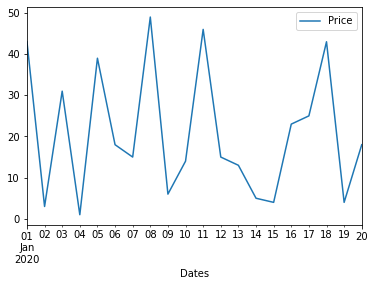

In [29]:
df.plot.line(x='Dates',y='Price')

In [30]:
df['Moving Average']=df['Price'].rolling(5).mean()

In [31]:
df.head(7) #estimating mean after 4th value

,Dates,Price,Moving Average
0,2020-01-01,43,NaN
1,2020-01-02,3,NaN
2,2020-01-03,31,NaN
3,2020-01-04,1,NaN
4,2020-01-05,39,23.4
5,2020-01-06,18,18.4
6,2020-01-07,15,20.8


<AxesSubplot:xlabel='Dates'>

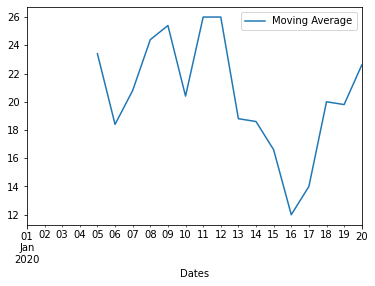

In [32]:
df.plot.line(x='Dates',y='Moving Average')

<AxesSubplot:xlabel='Dates'>

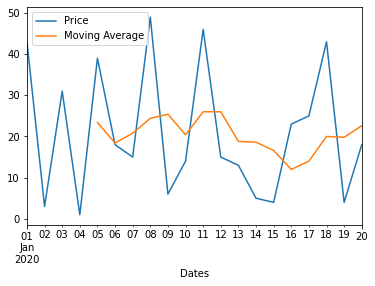

In [33]:
df.plot.line(x='Dates',y=['Price','Moving Average'])

In [34]:
close_px_all = pd.read_csv('https://raw.githubusercontent.com/BrambleXu/pydata-notebook/master/examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [35]:
close_px_all.head(3)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


In [36]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [37]:
close_px.head(3)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96


In [38]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

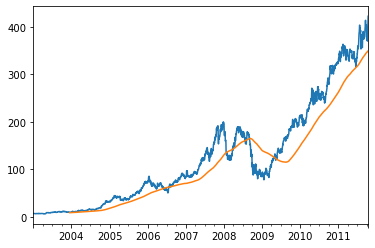

In [39]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window=250).mean().plot() 
#provide rolling window calculation : calculate mean after first 249 rows

In [40]:
appl_std = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std[5:12]  

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

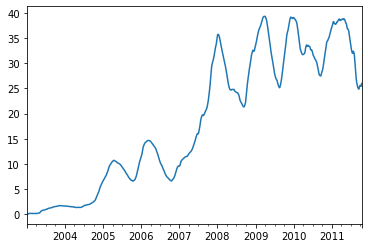

In [41]:
appl_std.plot()

<AxesSubplot:>

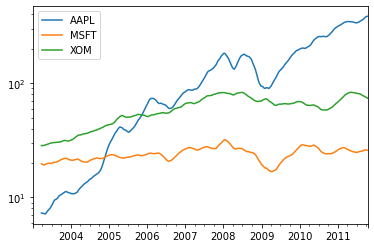

In [42]:
expanding_mean = appl_std.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [43]:
close_px.rolling('20D').mean().head(5)

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


# Exponentially Weighted Functions

**DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)**

In [44]:
aapl_px = close_px.AAPL['2006':'2007']

<AxesSubplot:>

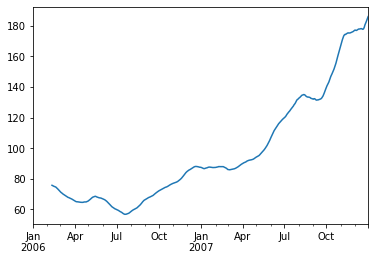

In [56]:
ma60 = aapl_px.rolling(30).mean()
ma60.plot()

In [46]:
ewma60 = aapl_px.ewm(span=30).mean() # exponential weighted (EW) functions.

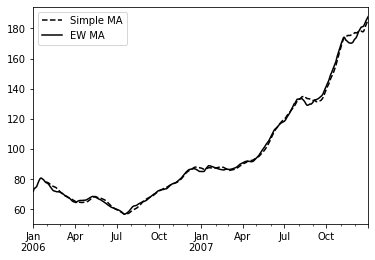

In [47]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

# Binary Moving Window Functions


In [48]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [49]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

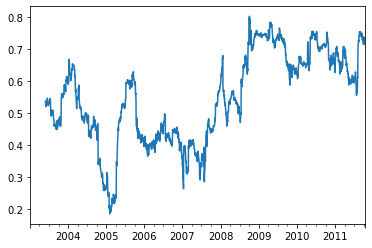

In [50]:
corr.plot()

In [51]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

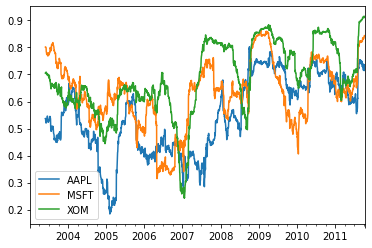

In [52]:
corr.plot()

# User-Defined Moving Window Functions


<AxesSubplot:>

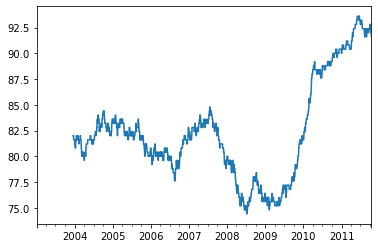

In [53]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()